# [Video Game]
#### Data World 
    *https://data.world/craigkelly/steam-game-data
    [Shareholder] They are a publisher, they want buy a new team but want to make sure they make good choice
        [Question1] Can we build a predict/regression model to predict a potential interval for steamspyowners? 
        [Question2] Metacritic scores are from 0 -100. Could we build a classifer model?
#### Kaggle
	*https://www.kaggle.com/gregorut/videogamesales
	*https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings
	*https://www.kaggle.com/kendallgillies/video-game-sales-and-ratings
     [Shareholder] They are a publisher is looking for recommendations for what types of game to make
         [Question1] Can we pridict Global_Sales


# [Animals]
##### Kaggle 
    *https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-outcomes-and
    [Shareholder] ?????
    
    [Not Enough]https://www.kaggle.com/mbogernetto/brazilian-amazon-rainforest-degradation
    [Not independent]https://www.kaggle.com/se18m502/bee-hive-metrics#weight_2017.csv
    [Not independent]https://www.kaggle.com/hocop1/cat-and-dog-breeds-parameters
    [Not independent]https://www.kaggle.com/jessicali9530/honey-production
    
# [Medical]
##### Kaggle
    [Not independent]https://www.kaggle.com/de5d5fe61fcaa6ad7a66/coronavirus-dataset-update-0206

# [Vehicle]
##### Data World
    https://data.world/nhtsa/nhtsas-odi-recalls/workspace/project-summary?agentid=nhtsa&datasetid=nhtsas-odi-recalls

##### Kaggle
    https://www.kaggle.com/austinreese/craigslist-carstrucks-data
    [ShareHolder] A small start up want to build an app to help people buy better cars off craiglist. 
        [Question1] Can we classify the cars by title_status?
        [Question2] Can we predict the odometer for the car?
        [Question3] Can we classify condition
        
    *https://www.kaggle.com/mirosval/personal-cars-classifieds
    [ShareHolder] Find cars for people app
        [Question]The user get an estimate of price_eur based on car details
        
# [Misc]
##### Buzzfeed
    *https://github.com/BuzzFeedNews/2014-06-firework-injuries
    [Shareholder] We're an evil insurance company, which collection of people should we raise the price? 
    [Question]
    
    *https://www.kaggle.com/rusiano/snooker-data-19822020#players_r.csv

# Video Game Sales Model
### Goals
This project aims to answer 2 questions

* Rather the population size of a region has a relation to carbon emissions.
* Was there a significant effect on carbon emissions based on year and state

### Project Members:
* [Laurent Mundell](https://github.com/LaurentStar)
* [Joe Hart](https://github.com/joseh4)


### Table of Contents
    -Imports
    -Data Sources
    -Load Data
    -Methods/Globals/Constants
    -Explore Data Analysis
    -Explore Data Visuals
    -Data Prep
    -Hypothesis Test I
    -Hypothesis Test II


* [Video Game Sales with Ratings](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings)
* [Google Trends work around](https://www.quora.com/How-can-I-see-absolute-search-number-volume-on-Google-Trends)

# [from past self] laurent remember to uninstall pyautogui module in python from you computer.

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
%matplotlib inline

# Load Data

In [22]:
_  = os.path.join('data', 'Video_Games_Sales_as_at_22_Dec_2016.csv')
video_game_df = pd.read_csv(_)

# Methods/Globals/Constants

In [23]:
def fillna_average_by_target_column(row, avg_dict, target_col, effected_col):
    """
    When given a row of a dataframe, this method will use the target column to fill nan values with 
    the average associated with the catagorical values in the effected column. 
    
    Parameters
    ----------
    row :  Dataframe row.
    avg_dict : A dictionary of the average of the catagorical values in the target column of the dataframe
    target_col : index of where the target column is in the dataframe
    effected_col :  index of where the effected column is in the dataframe
    
    Returns
    -------
    a dataframe row with effect column value changed if it is null
    """
    try:
        if np.isnan(row[effected_col]):      
            row[effected_col] = np.round(avg_dict[row[target_col]], 2)
    except:
        pass #row[effected_col] = "???"
        
    return row



GENRE_CRITIC_SCORE_AVG = {'Sports' : video_game_df[video_game_df['Genre'] == 'Sports']['Critic_Score'].mean(),
              'Platform': video_game_df[video_game_df['Genre'] == 'Platform']['Critic_Score'].mean(),
              'Racing': video_game_df[video_game_df['Genre'] == 'Racing']['Critic_Score'].mean(),
              'Role-Playing': video_game_df[video_game_df['Genre'] == 'Role-Playing']['Critic_Score'].mean(),
              'Puzzle': video_game_df[video_game_df['Genre'] == 'Puzzle']['Critic_Score'].mean(),
              'Misc': video_game_df[video_game_df['Genre'] == 'Misc']['Critic_Score'].mean(),
              'Shooter': video_game_df[video_game_df['Genre'] == 'Shooter']['Critic_Score'].mean(),
              'Simulation': video_game_df[video_game_df['Genre'] == 'Simulation']['Critic_Score'].mean(),
              'Action': video_game_df[video_game_df['Genre'] == 'Action']['Critic_Score'].mean(),
              'Fighting': video_game_df[video_game_df['Genre'] == 'Fighting']['Critic_Score'].mean(),
              'Adventure' : video_game_df[video_game_df['Genre'] == 'Adventure']['Critic_Score'].mean(),
              'Strategy' : video_game_df[video_game_df['Genre'] == 'Strategy']['Critic_Score'].mean(),
}

GENRE_CRITIC_COUNT_AVG = {'Sports' : video_game_df[video_game_df['Genre'] == 'Sports']['Critic_Count'].mean(),
              'Platform': video_game_df[video_game_df['Genre'] == 'Platform']['Critic_Count'].mean(),
              'Racing': video_game_df[video_game_df['Genre'] == 'Racing']['Critic_Count'].mean(),
              'Role-Playing': video_game_df[video_game_df['Genre'] == 'Role-Playing']['Critic_Count'].mean(),
              'Puzzle': video_game_df[video_game_df['Genre'] == 'Puzzle']['Critic_Count'].mean(),
              'Misc': video_game_df[video_game_df['Genre'] == 'Misc']['Critic_Count'].mean(),
              'Shooter': video_game_df[video_game_df['Genre'] == 'Shooter']['Critic_Count'].mean(),
              'Simulation': video_game_df[video_game_df['Genre'] == 'Simulation']['Critic_Count'].mean(),
              'Action': video_game_df[video_game_df['Genre'] == 'Action']['Critic_Count'].mean(),
              'Fighting': video_game_df[video_game_df['Genre'] == 'Fighting']['Critic_Count'].mean(),
              'Adventure' : video_game_df[video_game_df['Genre'] == 'Adventure']['Critic_Count'].mean(),
              'Strategy' : video_game_df[video_game_df['Genre'] == 'Strategy']['Critic_Count'].mean(),
}


# Fix user score to get the average values
video_game_df['User_Score'] = video_game_df['User_Score'].replace(to_replace = 'tbd', value = np.nan).astype(float)

GENRE_USER_SCORE_AVG = {'Sports' : video_game_df[video_game_df['Genre'] == 'Sports']['User_Score'].mean(),
              'Platform': video_game_df[video_game_df['Genre'] == 'Platform']['User_Score'].mean(),
              'Racing': video_game_df[video_game_df['Genre'] == 'Racing']['User_Score'].mean(),
              'Role-Playing': video_game_df[video_game_df['Genre'] == 'Role-Playing']['User_Score'].mean(),
              'Puzzle': video_game_df[video_game_df['Genre'] == 'Puzzle']['User_Score'].mean(),
              'Misc': video_game_df[video_game_df['Genre'] == 'Misc']['User_Score'].mean(),
              'Shooter': video_game_df[video_game_df['Genre'] == 'Shooter']['User_Score'].mean(),
              'Simulation': video_game_df[video_game_df['Genre'] == 'Simulation']['User_Score'].mean(),
              'Action': video_game_df[video_game_df['Genre'] == 'Action']['User_Score'].mean(),
              'Fighting': video_game_df[video_game_df['Genre'] == 'Fighting']['User_Score'].mean(),
              'Adventure' : video_game_df[video_game_df['Genre'] == 'Adventure']['User_Score'].mean(),
              'Strategy' : video_game_df[video_game_df['Genre'] == 'Strategy']['User_Score'].mean(),
}

GENRE_USER_COUNT_AVG = {'Sports' : video_game_df[video_game_df['Genre'] == 'Sports']['User_Count'].mean(),
              'Platform': video_game_df[video_game_df['Genre'] == 'Platform']['User_Count'].mean(),
              'Racing': video_game_df[video_game_df['Genre'] == 'Racing']['User_Count'].mean(),
              'Role-Playing': video_game_df[video_game_df['Genre'] == 'Role-Playing']['User_Count'].mean(),
              'Puzzle': video_game_df[video_game_df['Genre'] == 'Puzzle']['User_Count'].mean(),
              'Misc': video_game_df[video_game_df['Genre'] == 'Misc']['User_Count'].mean(),
              'Shooter': video_game_df[video_game_df['Genre'] == 'Shooter']['User_Count'].mean(),
              'Simulation': video_game_df[video_game_df['Genre'] == 'Simulation']['User_Count'].mean(),
              'Action': video_game_df[video_game_df['Genre'] == 'Action']['User_Count'].mean(),
              'Fighting': video_game_df[video_game_df['Genre'] == 'Fighting']['User_Count'].mean(),
              'Adventure' : video_game_df[video_game_df['Genre'] == 'Adventure']['User_Count'].mean(),
              'Strategy' : video_game_df[video_game_df['Genre'] == 'Strategy']['User_Count'].mean(),
}


STYLE = {'purple' : '\033[95m',
               'cyan' : '\033[96m',
               'darkcyan' : '\033[36m',
               'blue' : '\033[94m',
               'green' : '\033[92m',
               'yellow' : '\033[93m',
               'red' : '\033[91m',
               'bold' : '\033[1m',
               'underline' : '\033[4m',
               'end' : '\033[0m'
}

#### Get search data.... Remove this module

In [15]:
# # Get data from Google Keyword(Please remember to uninstall this module)
# import pyautogui
# import time 
# import pyperclip

In [ ]:
# print(pyautogui.size())
# pyautogui.moveRel(0, 50, duration = 1)  # Start Location
# print(pyautogui.position())
# pyautogui.moveRel(0, 500, duration = 1) # Move by relative space
# pyautogui.click(100, 100) 
# pyautogui.typewrite("hello Geeks !") 
# pyautogui.hotkey("ctrlleft", "a") 

In [ ]:
# pyautogui.moveTo(370, 600, duration = 1) # Move to + keyword
# pyautogui.click() 
# pyautogui.moveRel(0, -150, duration = 1) # Move to enter keyword
# pyautogui.click()
# pyautogui.typewrite("hello Geeks") 
# pyautogui.moveRel(-120, -80, duration = 1) # Move to add key word to plan
# pyautogui.click()
# pyautogui.moveRel(0, 50, duration = 1)
# pyautogui.click()
# pyautogui.moveRel(-60, 180, duration = 1)
# pyautogui.click()
# pyautogui.click()
# pyautogui.scroll(2000) 
# pyautogui.moveRel(500, -300, duration = 1)
# pyautogui.click()
# pyautogui.moveRel(375, 170, duration = 4)
# pyautogui.click()
# pyautogui.click()
# pyautogui.click()
# pyautogui.hotkey("ctrlleft", "c") 
# #df[row][column] = pyperclip.paste()
# pyautogui.moveRel(-300, 270, duration = 1)
# pyautogui.click()
# pyautogui.moveRel(80, -90, duration = 1) #Move back to 
# val = input("Enter your value: ") 
# pyautogui.moveRel(80, -90, duration = 1)
# print(pyautogui.position())

In [ ]:
# pyautogui.moveTo(370, 400, duration = 1)
# pyautogui.click()
# pyautogui.scroll(1000) # Po

# Exploratory Data Analysis

In [6]:
display(video_game_df.head())
display(video_game_df.info())
display(video_game_df.describe().T)
print('Shape:', video_game_df.shape)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8,322,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.06,23.7,7.3,23.7,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,72.65,32.49,7.62,32.49,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       16719 non-null object
Critic_Count       16719 non-null object
User_Score         16719 non-null object
User_Count         16719 non-null object
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(6), object(10)
memory usage: 2.0+ MB


None

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16450.0,2006.487356,5.878995,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16719.0,0.263330,0.813514,0.00,0.00,0.08,0.24,41.36
EU_Sales,16719.0,0.145025,0.503283,0.00,0.00,0.02,0.11,28.96
JP_Sales,16719.0,0.077602,0.308818,0.00,0.00,0.00,0.04,10.22
Other_Sales,16719.0,0.047332,0.186710,0.00,0.00,0.01,0.03,10.57
Global_Sales,16719.0,0.533543,1.547935,0.01,0.06,0.17,0.47,82.53


Shape: (16719, 16)


In [ ]:
for name in video_game_df.columns:
    print('-'*30, STYLE['bold'], name, STYLE['end'],'-'*30)
    display(video_game_df[name].value_counts())

# Exploratory Data Visualization

In [ ]:
sns.pairplot(video_game_df);

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))  
sns.heatmap(video_game_df.corr(), annot=True, ax=ax);

# Data Prep

In [27]:
video_game_null_fill_df = video_game_df.copy()
video_game_null_remove_df = video_game_df.copy()

In [28]:
#Drop Nan rows
video_game_null_remove_df.Genre.dropna(inplace = True)

In [29]:
#Fill all nan value with the average by genre
video_game_null_fill_df = video_game_null_fill_df.apply(lambda x : fillna_average_by_target_column(x, GENRE_CRITIC_SCORE_AVG, 3, 10),  axis=1)
video_game_null_fill_df = video_game_null_fill_df.apply(lambda x : fillna_average_by_target_column(x, GENRE_CRITIC_COUNT_AVG, 3, 11),  axis=1)
video_game_null_fill_df = video_game_null_fill_df.apply(lambda x : fillna_average_by_target_column(x, GENRE_USER_SCORE_AVG, 3, 12),  axis=1)
video_game_null_fill_df = video_game_null_fill_df.apply(lambda x : fillna_average_by_target_column(x, GENRE_CRITIC_COUNT_AVG, 3, 13),  axis=1)
video_game_null_fill_df.drop(columns=['EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], inplace=True)

# Cleaned Data Exploratory Analysis

Dataframe with filled nan values


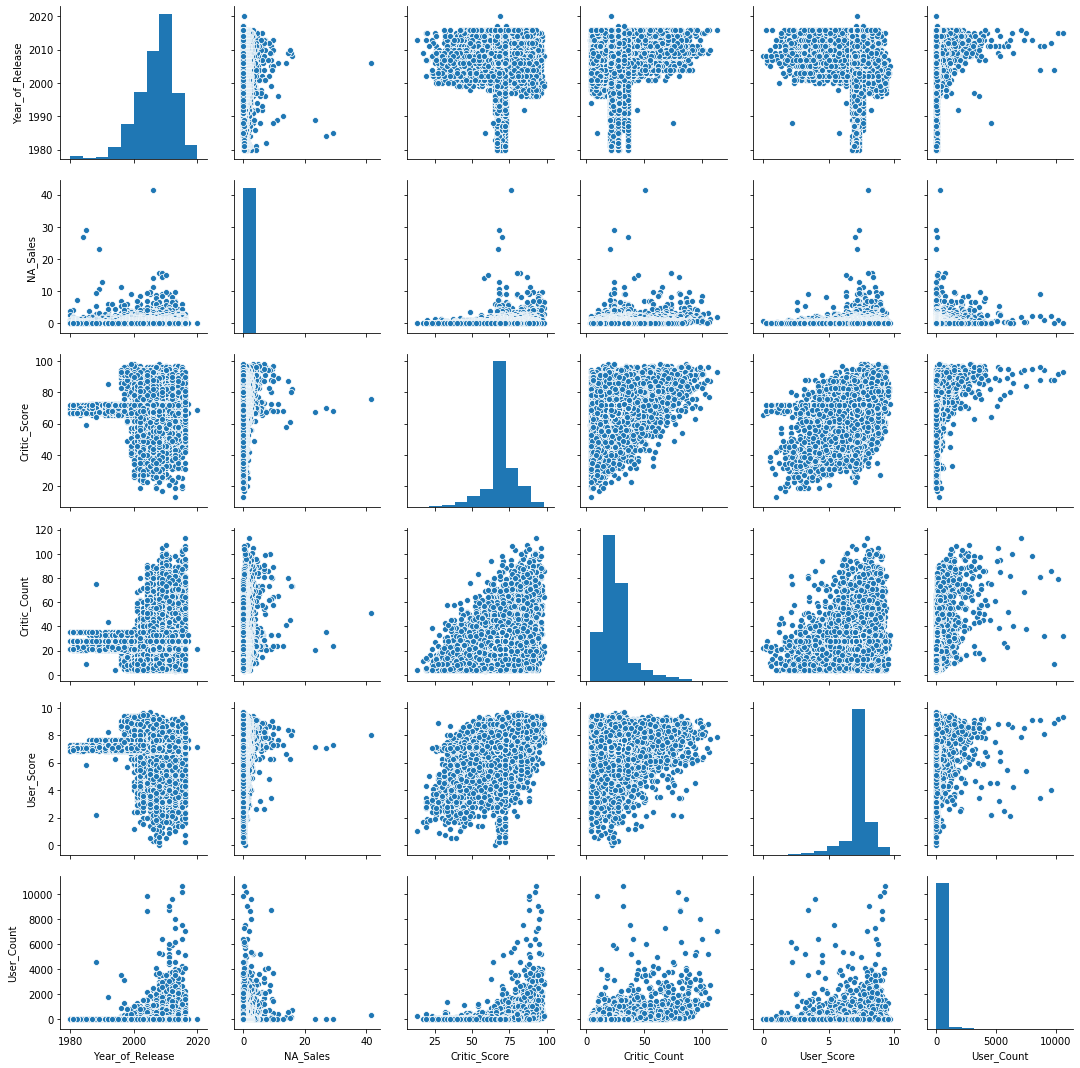

In [31]:
print('Dataframe with filled nan values')
sns.pairplot(video_game_null_fill_df);

Dataframe with removed nan values


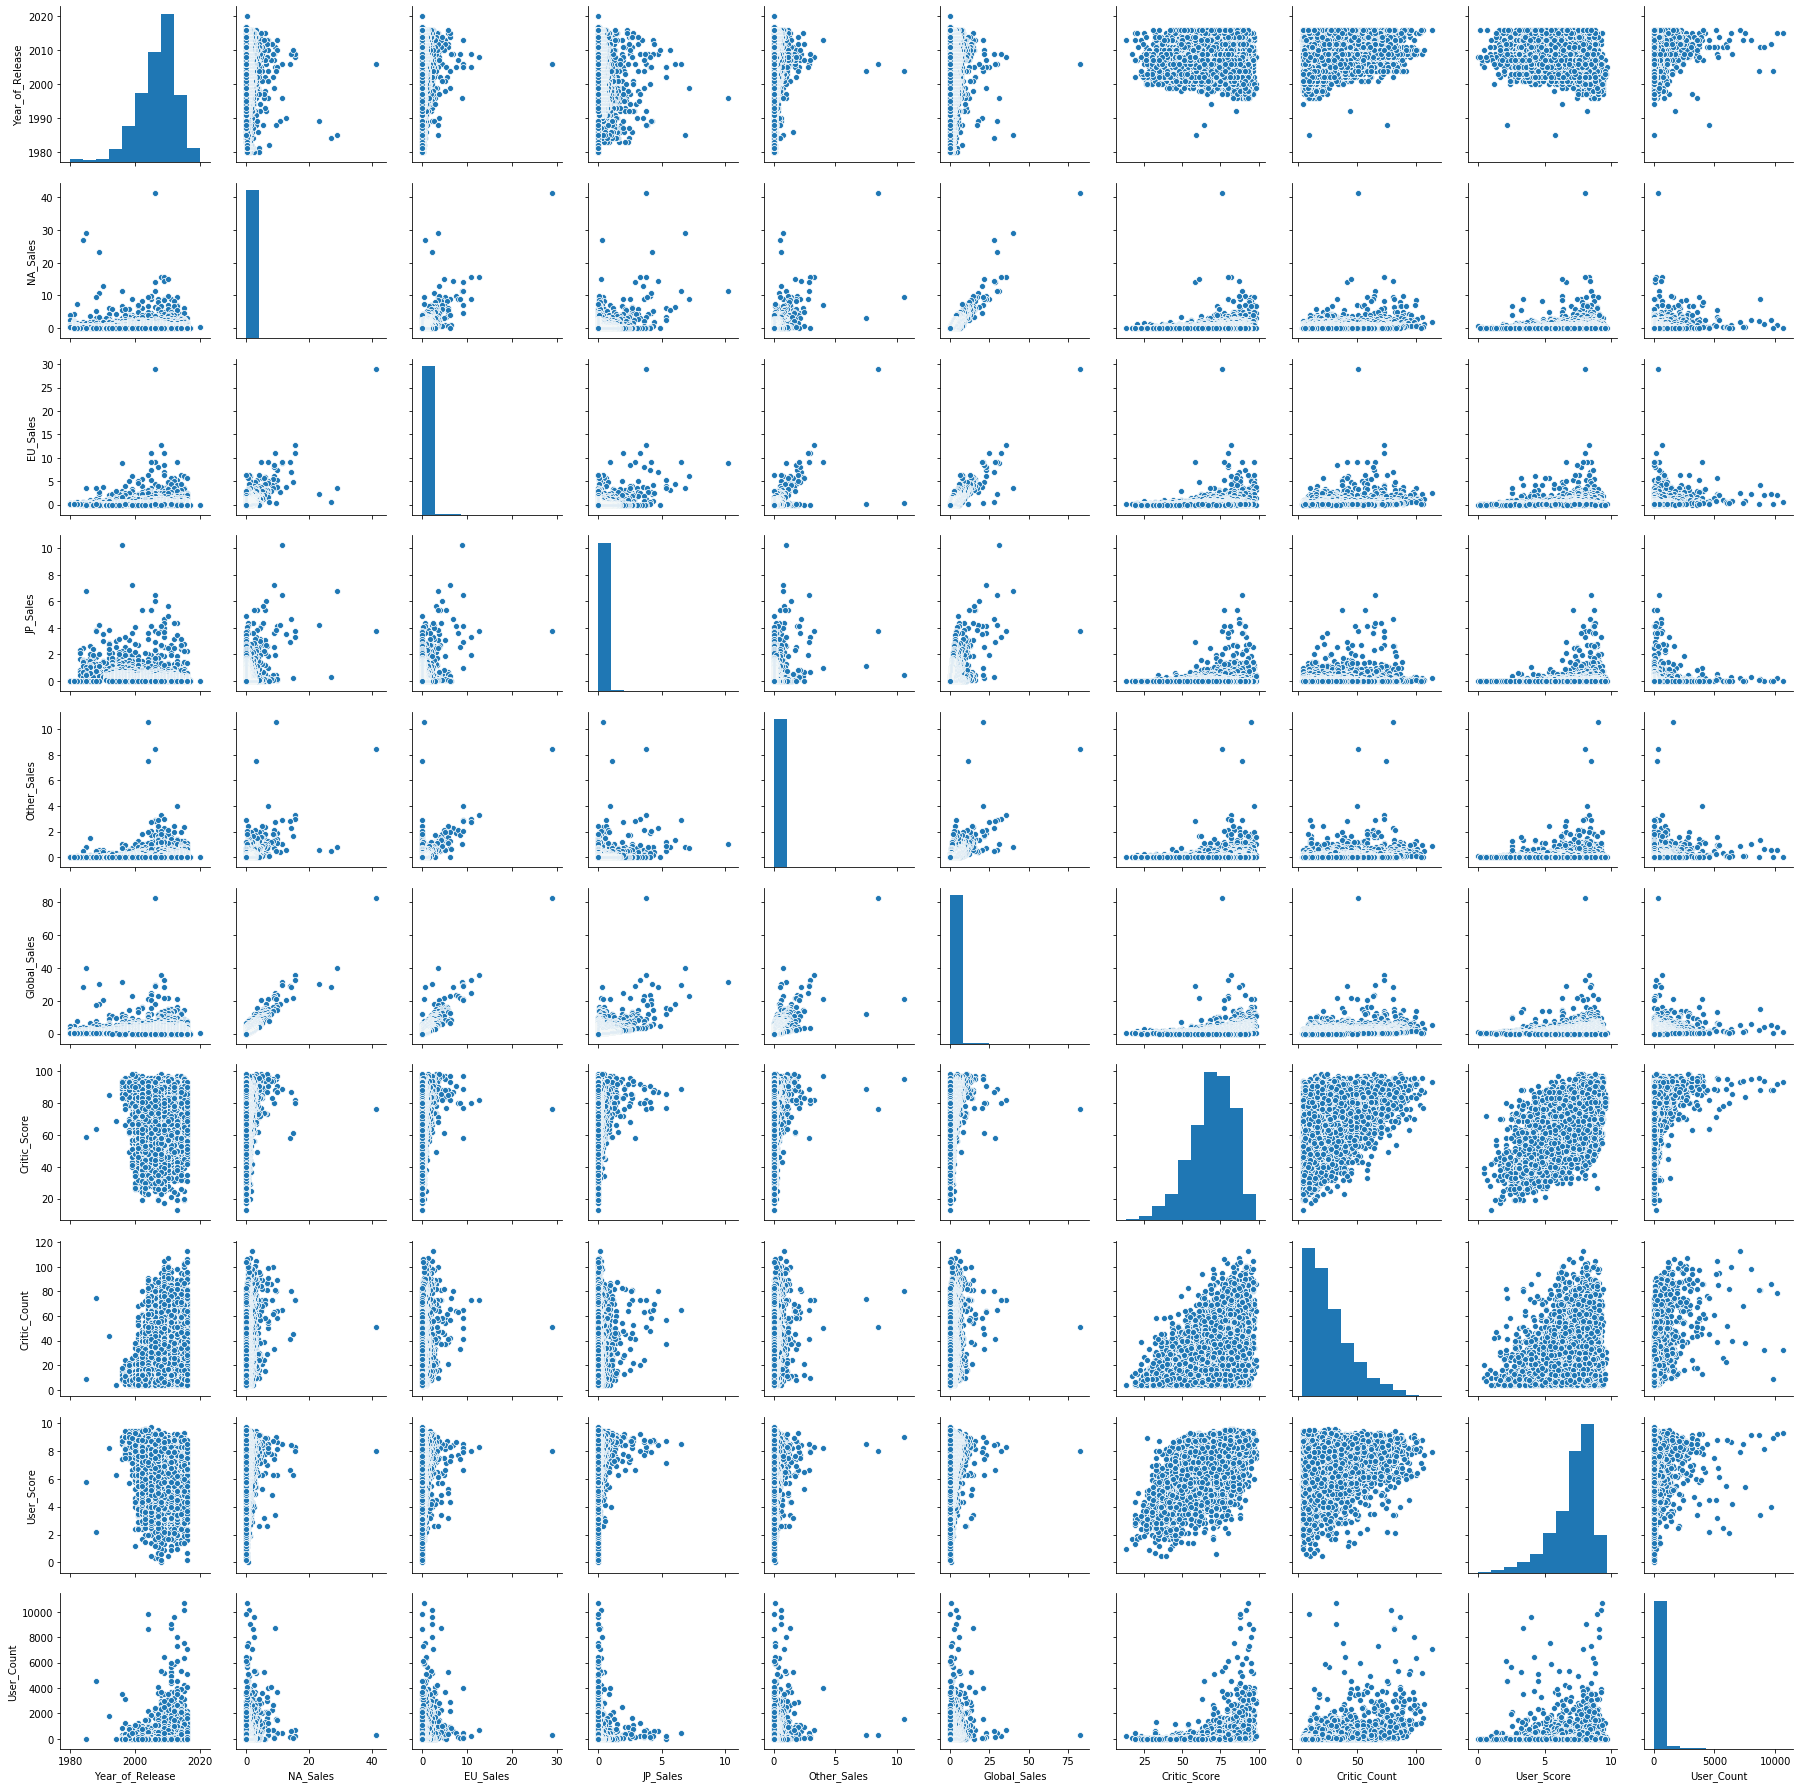

In [33]:
print('Dataframe with removed nan values')
sns.pairplot(video_game_null_remove_df);

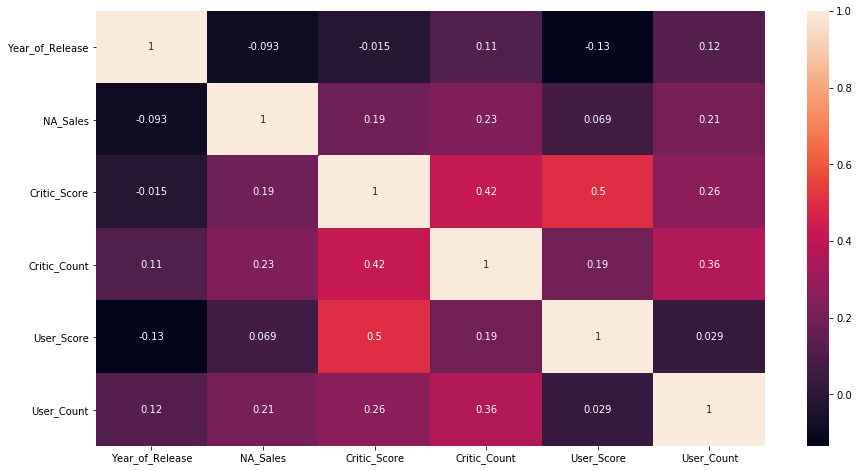

In [21]:
fig, ax = plt.subplots(figsize=(15,8))  
sns.heatmap(video_game_null_fill_df.corr(), annot=True, ax=ax);

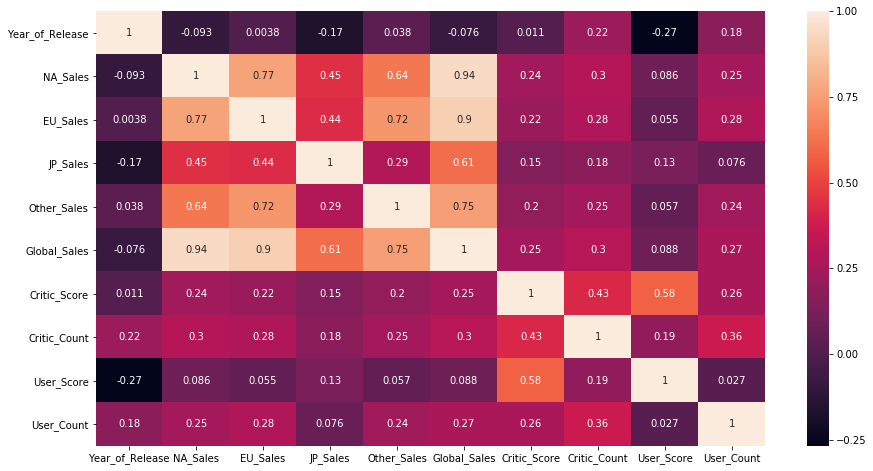

In [32]:
fig, ax = plt.subplots(figsize=(15,8))  
sns.heatmap(video_game_null_remove_df.corr(), annot=True, ax=ax);

# Scaling/Normalizing Data

In [ ]:
video_game_df[feat].map(lambda x: np.log(x))